Customer segmentation using KMeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\K_Means_Project\\data\\raw\\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dropping CustomerID and Gender since they are not relevant for this analysis

Although Gender is an available feature, exploratory analysis shows significant overlap in spending and income behavior across genders. Additionally, as a categorical variable, encoding Gender for K-Means would introduce artificial distance assumptions. Therefore, Gender is excluded from clustering and retained only for post-cluster interpretation.

In [4]:
new_df = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [5]:
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


#### Since K-Means is distance-based and the selected features operate on different scales, feature scaling is required. StandardScaler is used to normalize features to zero mean and unit variance, ensuring that no single variable disproportionately influences the clustering outcome.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scale = StandardScaler()

In [8]:
scaled_data = scale.fit_transform(new_df)

In [9]:
scaled_df = pd.DataFrame(scaled_data, columns = new_df.columns)

In [10]:
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


##### Beginning of KMeans

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
clusters = list(range(2,11))
clusters

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [60]:
inertia = []
silhouette_scores = []

In [61]:
for k in clusters : 
    kmeans = KMeans(n_clusters=k,n_init=100,random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

In [104]:
inertia_df = pd.DataFrame(inertia, index = range(2,11), columns = ['inertia'])
ss_df = pd.DataFrame(silhouette_scores, index = range(2,11), columns = ['silhouette_score'])

Text(0.5, 1.0, 'Silhouette Score vs Cluster Plot')

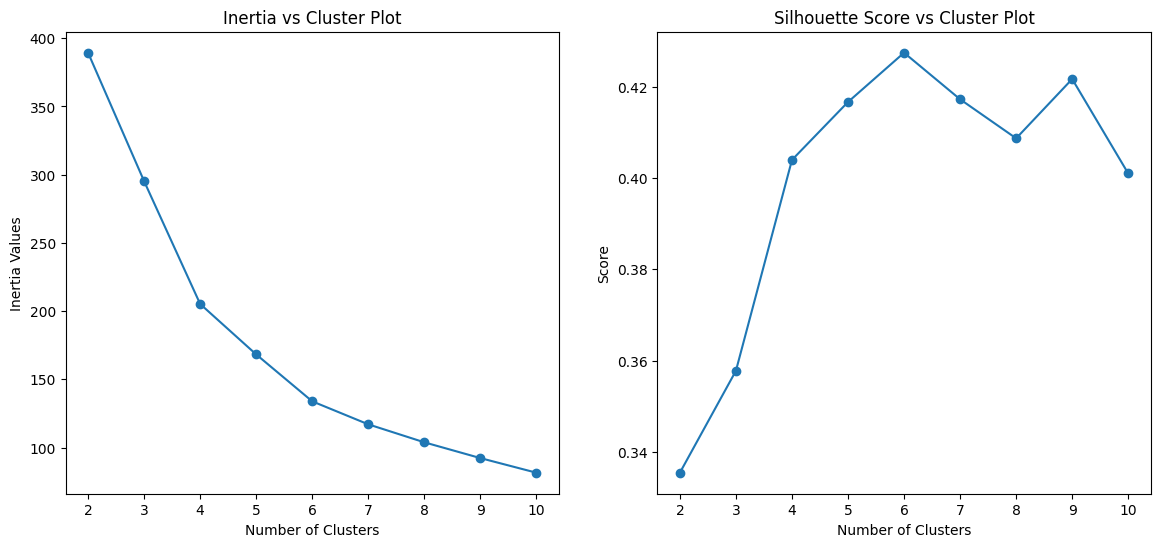

In [105]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.plot(inertia_df,marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Values')
plt.title('Inertia vs Cluster Plot')

plt.subplot(1,2,2)
plt.plot(ss_df,marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Score vs Cluster Plot')


Applying Kmeans with 4 clusters since Inertia has dropped significantly till 4 and then started stabilizing

In [99]:
kmeans4 = KMeans(n_clusters=4,n_init=100,random_state=42)
kmeans4.fit(scaled_df)
inertia_four = kmeans4.inertia_
ss_four = silhouette_score(scaled_df,kmeans4.labels_)
print(inertia_four, ss_four)
print(kmeans4.labels_)


205.2251474767592 0.4039582785148566
[2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 3 2 2 2 0 0 0 0 2 3 1 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Experimenting with 5 clusters as well

In [100]:
kmeans5 = KMeans(n_clusters=5,n_init=100,random_state=42)
kmeans5.fit(scaled_df)
inertia_five = kmeans5.inertia_
ss_five = silhouette_score(scaled_df,kmeans5.labels_)
print(inertia_five, ss_five)
print(kmeans5.labels_)

168.24758017556837 0.41664341513732767
[1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 4 1 0 1 0 1 4 1 1 1 4 1 1 4 4 4 4 4 1 4 4 1 4 4 4 1 4 4 1 1 4 4 4 4
 4 1 4 4 1 4 4 1 4 4 1 4 4 1 1 4 4 1 4 4 1 1 4 1 4 1 1 4 4 1 4 1 4 4 4 4 4
 1 3 1 1 1 4 4 4 4 1 3 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 4 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


Experimenting with 6 clusters

In [106]:
kmeans6 = KMeans(n_clusters=6,n_init=100,random_state=42)
kmeans6.fit(scaled_df)
inertia_six = kmeans6.inertia_
ss_six = silhouette_score(scaled_df,kmeans6.labels_)
print(inertia_six, ss_six)
print(kmeans6.labels_)

133.86833362685587 0.42742814991580175
[2 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 1 2 5 2 5 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
 4 4 4 4 4 1 1 1 1 4 4 4 3 4 3 0 3 0 3 0 3 4 3 0 3 0 3 4 3 0 3 4 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [111]:
df_labels = pd.DataFrame(kmeans6.labels_, columns = ['cluster_label'])

In [125]:
labeled_df = pd.concat([new_df,df_labels], axis = 1)

In [126]:
labeled_df['cluster_label'].value_counts()

cluster_label
1    45
3    39
4    38
0    33
2    24
5    21
Name: count, dtype: int64

In [127]:
labeled_df

,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,19,15,39,2
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,3
196,45,126,28,0
197,32,126,74,3
198,32,137,18,0


In [128]:
cluster_color = {
    0 : 'Green',
    1 : 'Red',
    2 : 'Yellow',
    3 : 'Blue', 
    4 : 'Black',
    5 : 'Purple'
}

In [ ]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster_label', data = labeled_df)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

plt.subplot(1,3,2)
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', hue = 'cluster_label' , data = labeled_df)
plt.ylabel('Annual Income')
plt.xlabel('Age')

plt.subplot(1,3,3)
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', hue ='cluster_label', data = labeled_df)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.tight_layout()
plt.show()